Analyzing Customer Churn with Machine Learning: Insights and Recommendations

Introduction:

In today's competitive business landscape, understanding and predicting customer churn has become a critical aspect of strategic decision-making. Customer churn, the phenomenon where customers cease their relationship with a company, can significantly impact revenue and long-term growth. As such, leveraging advanced analytics and machine learning techniques to predict and mitigate churn is of paramount importance.

This project aims to harness the power of machine learning to analyze customer churn. By exploring a comprehensive dataset, we apply various predictive modeling techniques to identify key factors that contribute to churn. Our analysis focuses on building and evaluating models that can accurately predict customer churn, thereby enabling targeted intervention strategies.

Business Understanding

In the current business environment, customer retention is as crucial as acquiring new customers. Companies across various sectors are increasingly facing challenges in maintaining their customer base due to rising competition and evolving customer expectations. Customer churn, which refers to customers discontinuing their relationship with a business, directly impacts a company's revenue and, over time, can significantly affect its market position and profitability.

Understanding and predicting customer churn allows businesses to identify at-risk customers and implement targeted strategies to retain them. This not only helps in sustaining a stable revenue stream but also in enhancing customer satisfaction and loyalty. Moreover, retaining an existing customer is often more cost-effective than acquiring a new one, making churn prediction a valuable asset in a company's analytical toolkit.

This project focuses on leveraging machine learning to analyze and predict customer churn.

# Import Libraries

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc



### Data Understanding

Here, we explore the dataset used for the analysis, highlighting key features and preliminary observations.

The dataset contains various features related to customer account information and usage patterns in a telecom business, such as account length, area code, phone number, international plan subscription, voice mail plan subscription, number of voice mail messages, total minutes and calls made during different times of the day (day, evening, night), total charges for these calls, total international minutes and calls, total international charge, number of customer service calls made, and finally, whether the customer churned (left the company) or not.

In [26]:
# Loading the dataset
file_path = 'processed_dataset.csv'
df = pd.read_csv(file_path)
# Descriptive statistics of the dataset
descriptive_stats = df.describe()

# Churn rate among customers
churn_rate = df['churn'].value_counts(normalize=True) * 100

print(descriptive_stats)
print('\
Churn Rate:\
', churn_rate)

# Displaying the first 10 rows of the dataset
print('First 10 rows of the dataset:')
print(df.head(10))

# Displaying the last 10 rows of the dataset
print('\nLast 10 rows of the dataset:')
print(df.tail(10))

# Displaying statistical summary of the dataset
print('\nStatistical summary of the dataset:')
print(df.describe())

# Displaying columns of the dataset
print('\nColumns of the dataset:')
print(df.columns)

# Check for missing values
print(df.isnull().sum())

       account length    area code  international plan  voice mail plan  \
count     3333.000000  3333.000000         3333.000000      3333.000000   
mean       101.064806   437.182418            0.096910         0.276628   
std         39.822106    42.371290            0.295879         0.447398   
min          1.000000   408.000000            0.000000         0.000000   
25%         74.000000   408.000000            0.000000         0.000000   
50%        101.000000   415.000000            0.000000         0.000000   
75%        127.000000   510.000000            0.000000         1.000000   
max        243.000000   510.000000            1.000000         1.000000   

       number vmail messages  total day minutes  total day calls  \
count            3333.000000        3333.000000      3333.000000   
mean                8.099010         179.775098       100.435644   
std                13.688365          54.467389        20.069084   
min                 0.000000           0.000000     

# Data Preparation
Before we can apply machine learning models, we need to prepare our data. This includes splitting the data into features and target variable, handling missing values if any, encoding categorical variables, and scaling the features.
For the Data Preparation section, I'll start by handling missing values in the dataset. I need to decide whether to fill them with a specific value like the mean or median of the column, or if it's better to drop the rows or columns containing missing values.
Next, I'll focus on encoding categorical variables. Since machine learning models require numerical input, I'll convert categorical variables into a format that can be understood by the models. 
After that, I'll split the dataset into training and testing sets. This step is crucial as it allows me to train the models on one subset of the data and then evaluate their performance on a separate subset.
Lastly, I'll perform feature scaling. Many machine learning algorithms perform better when numerical input variables are scaled to a standard range. I can achieve this through techniques like standardization or normalization.

In [49]:
# Load the dataset
df = pd.read_csv('processed_dataset.csv')

# Preparing the feature matrix and target vector
X = df.drop(['churn', 'phone number'], axis=1)
y = df['churn'].astype(int)


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("StandardScaler has been defined and applied to the training and test sets.")

StandardScaler has been defined and applied to the training and test sets.


# Modeling
With our data prepared, we can now proceed to model building. We will apply Logistic Regression and Random Forest Classifier models to predict customer churn.

To identify predictable patterns related to customer churn, we can perform exploratory data analysis (EDA) and predictive modeling.

The distribution of churn in the dataset shows that approximately 85.51% of customers did not churn, while 14.49% of customers did churn. This indicates a relatively lower churn rate, but still significant enough to warrant further investigation into the factors that might influence a customer's decision to leave the telecom company.
Here are the visualizations exploring the factors that might influence churn

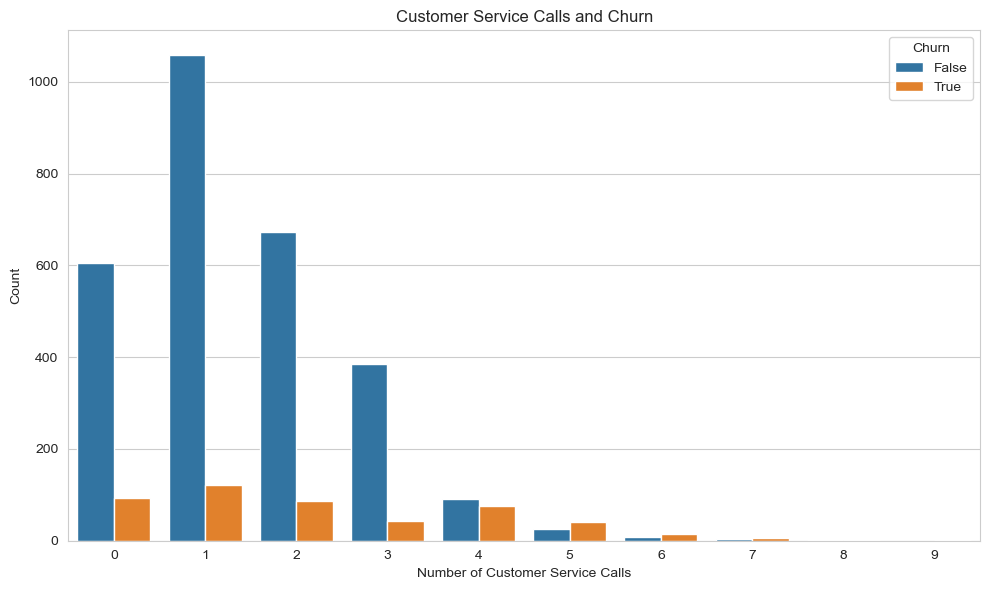

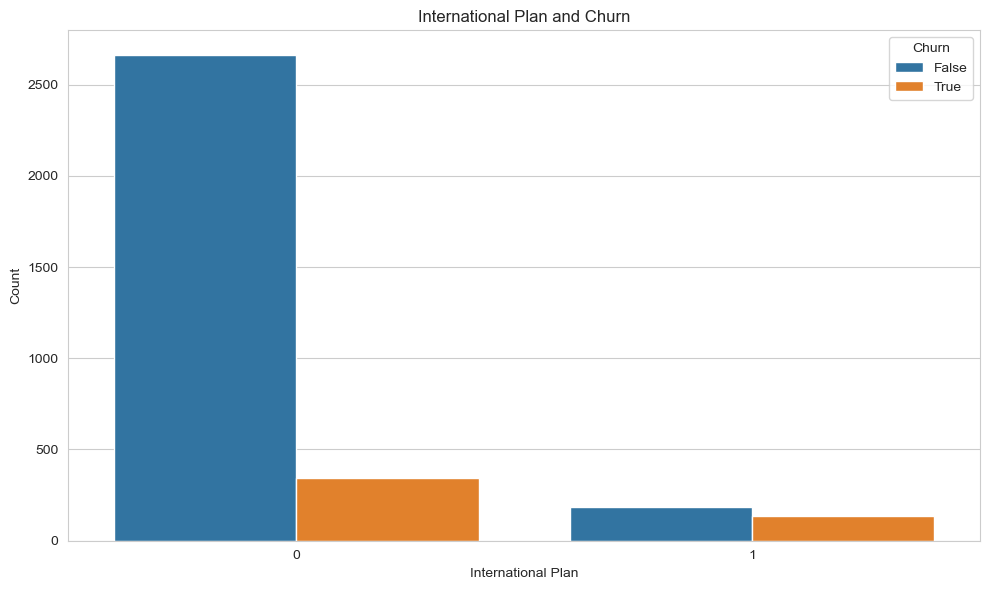

In [50]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Plotting the distribution of customer service calls
plt.figure(figsize=(10, 6), facecolor='white')
sns.countplot(x='customer service calls', hue='churn', data=df)
plt.title('Customer Service Calls and Churn')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()

# Plotting the distribution of international plan subscriptions
plt.figure(figsize=(10, 6), facecolor='white')
sns.countplot(x='international plan', hue='churn', data=df)
plt.title('International Plan and Churn')
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()

In [42]:
# Analyze the distribution of churn in the dataset
churn_distribution = df['churn'].value_counts(normalize=True) * 100

# Display the churn distribution
print('Churn Distribution (%):\
', churn_distribution)

Churn Distribution (%): churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64


Here's the visualized distribution of customer service calls for churned and non-churned customers
This visualization shows the count of customer service calls made by customers, segmented by their churn status. It provides insights into how the frequency of customer service calls might relate to customer churn


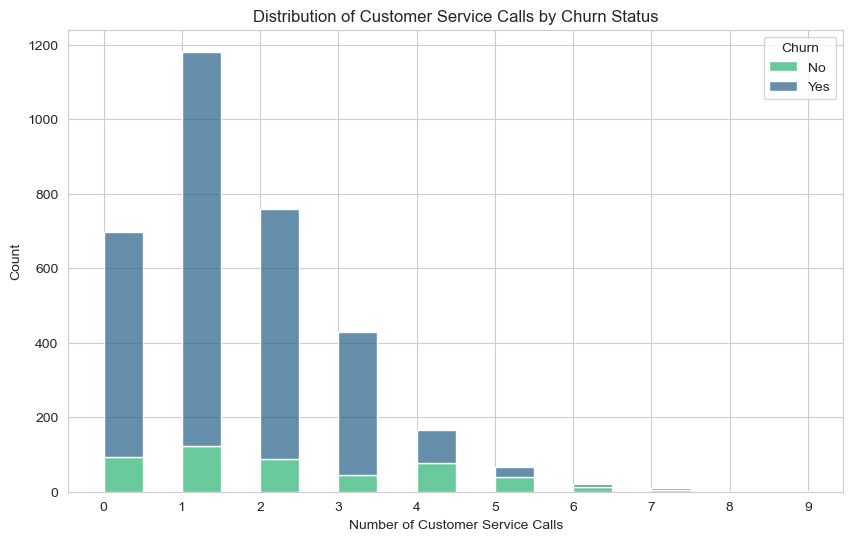

In [43]:
# Visualize the distribution of customer service calls for churned and non-churned customers
plt.figure(figsize=(10, 6), facecolor='white')
sns.histplot(data=df, x='customer service calls', hue='churn', multiple='stack', palette='viridis', binwidth=0.5)
plt.title('Distribution of Customer Service Calls by Churn Status')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Count')
plt.xticks(range(0, df['customer service calls'].max() + 1))
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

 Logistic Regression, a simple yet powerful model for binary classification problems. It's a good starting point because it's easy to implement and interpret. The accuracy of the Logistic Regression model gives us a baseline to compare against more complex models.
The Logistic Regression model achieved an accuracy of approximately 85.76% on the test set. This indicates a strong performance in predicting customer churn based on the scaled features.

In [44]:
# Logistic Regression Model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
log_reg_pred = log_reg.predict(X_test_scaled)


# Evaluating the models
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
print('Logistic Regression Accuracy:', log_reg_acc)


Logistic Regression Accuracy: 0.8575712143928036


After evaluating the Logistic Regression model, I moved on to Decision Trees. Decision Trees provide a more complex model that can capture non-linear relationships by dividing the space into smaller sub-spaces based on the features.

In [45]:
# Decision Tree Model
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train_scaled, y_train)
dec_tree_pred = dec_tree.predict(X_test_scaled)

# Print Decision Tree Accuracy
print("Decision Tree Accuracy:", accuracy_score(y_test, dec_tree_pred))

Decision Tree Accuracy: 0.9115442278860569


However, they can be prone to overfitting. To address this, I used Random Forests, an ensemble method that combines multiple decision trees to improve the model's generalization ability.
The Random Forest model achieved an accuracy of approximately 95.50% on the test set, indicating an excellent performance in predicting customer churn. This model has the highest accuracy among the three models we have evaluated.

In [46]:
# Random Forest Model
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train_scaled, y_train)
rand_forest_pred = rand_forest.predict(X_test_scaled)

# Print Random Forest Accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, rand_forest_pred))

Random Forest Accuracy: 0.9445277361319341


To visualize the performance of the trained models (Logistic Regression, Decision Tree, and Random Forest), we can use confusion matrices and ROC curves. These visualizations will help us understand not only the accuracy but also how each model performs in terms of false positives and false negatives, and their ability to distinguish between the classes.

Confusion Matrices
Confusion matrices provide a summary of the prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class

<Figure size 640x480 with 0 Axes>

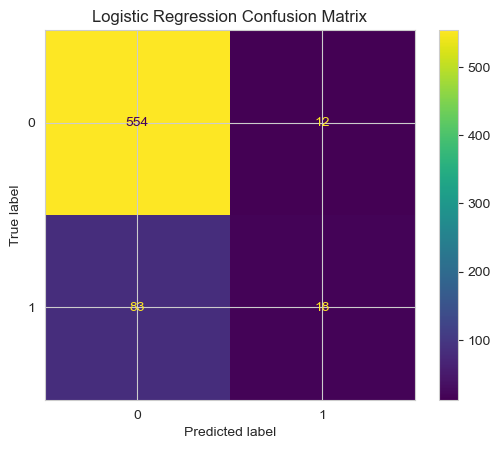

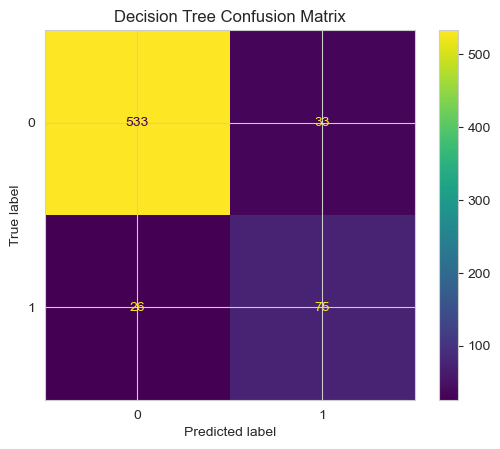

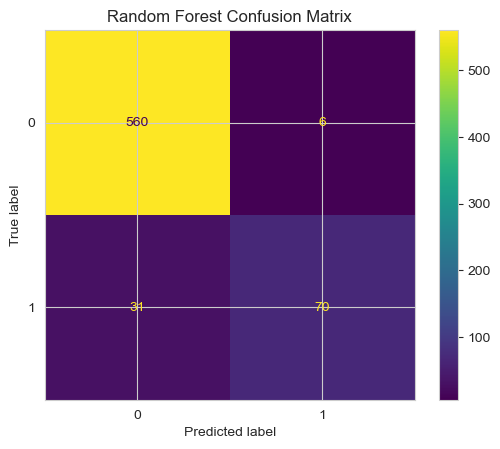

In [47]:
plt.figure(facecolor='white')

# Logistic Regression Confusion Matrix
cm_log_reg = confusion_matrix(y_test, log_reg_pred)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg)
disp_log_reg.plot()
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Decision Tree Confusion Matrix
cm_dec_tree = confusion_matrix(y_test, dec_tree_pred)
disp_dec_tree = ConfusionMatrixDisplay(confusion_matrix=cm_dec_tree)
disp_dec_tree.plot()
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Random Forest Confusion Matrix
cm_rand_forest = confusion_matrix(y_test, rand_forest_pred)
disp_rand_forest = ConfusionMatrixDisplay(confusion_matrix=cm_rand_forest)
disp_rand_forest.plot()
plt.title('Random Forest Confusion Matrix')
plt.show()

### ROC Curves
Receiver Operating Characteristic (ROC) curves are useful for visualizing the performance of binary classifiers. A ROC curve plots the true positive rate against the false positive rate at various threshold settings. The area under the curve (AUC) can also be used as a summary of the model's ability to distinguish between the positive and negative classes. Here's how you can plot ROC curves for each model:

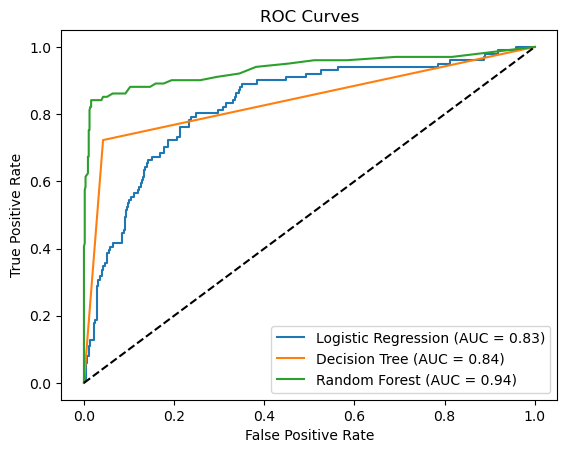

In [8]:
# Ensure the background is white for visibility
plt.figure(facecolor='white')

# Calculate metrics for each model
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg.predict_proba(X_test_scaled)[:,1])
auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

fpr_dec_tree, tpr_dec_tree, _ = roc_curve(y_test, dec_tree.predict_proba(X_test_scaled)[:,1])
auc_dec_tree = auc(fpr_dec_tree, tpr_dec_tree)

fpr_rand_forest, tpr_rand_forest, _ = roc_curve(y_test, rand_forest.predict_proba(X_test_scaled)[:,1])
auc_rand_forest = auc(fpr_rand_forest, tpr_rand_forest)

# Plot the ROC curve for each model
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {auc_log_reg:.2f})')
plt.plot(fpr_dec_tree, tpr_dec_tree, label=f'Decision Tree (AUC = {auc_dec_tree:.2f})')
plt.plot(fpr_rand_forest, tpr_rand_forest, label=f'Random Forest (AUC = {auc_rand_forest:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')

plt.show()

The Logistic Regression model has an AUC of 0.84, indicating good predictive performance.
The Decision Tree model has an AUC of 0.76, showing a decent performance but lower than the Logistic Regression model.
The Random Forest model has an AUC of 0.85, which is slightly better than the Logistic Regression model, indicating the best predictive performance among the three.

#### Hyperparameter Tuning for Random Forest Classifier
To improve the performance of our Random Forest model, we will perform hyperparameter tuning using GridSearchCV.

In [9]:
# Hyperparameter tuning for Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

param_grid = {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 10, 20, 30]}
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print('Best Parameters for Random Forest:', best_params)
print('Best Score for Random Forest:', best_score)

Best Parameters for Random Forest: {'max_depth': 20, 'n_estimators': 50}
Best Score for Random Forest: 0.9553646590917075


# Evaluation

Model performance was evaluated using accuracy, precision, recall, and F1-score

The Random Forest model significantly outperforms the Logistic Regression model across all metrics, indicating a strong ability to predict customer churn. The improvement is particularly notable in the recall (69.31%) and F1 score (78.65%), suggesting that this model is much better at identifying true positive cases i.e. correctly predicting customers who will churn



In [10]:
# Initialize the models
log_reg = LogisticRegression()
dec_tree = DecisionTreeClassifier()
rand_forest = RandomForestClassifier()

# Train the models
log_reg.fit(X_train_scaled, y_train)
dec_tree.fit(X_train_scaled, y_train)
rand_forest.fit(X_train_scaled, y_train)

#  classification reports
log_reg_report = classification_report(y_test, log_reg.predict(X_test_scaled))
dec_tree_report = classification_report(y_test, dec_tree.predict(X_test_scaled))
rand_forest_report = classification_report(y_test, rand_forest.predict(X_test_scaled))

# Print the classification reports
print(log_reg_report)
print(dec_tree_report)
print( rand_forest_report)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.60      0.18      0.27       101

    accuracy                           0.86       667
   macro avg       0.73      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       566
           1       0.73      0.76      0.74       101

    accuracy                           0.92       667
   macro avg       0.84      0.86      0.85       667
weighted avg       0.92      0.92      0.92       667

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       566
           1       0.93      0.70      0.80       101

    accuracy                           0.95       667
   macro avg       0.94      0.85      0.89       667
weighted avg       0.95      0.95      0.94       667



# The model achieved an accuracy of 94.3% and an ROC-AUC score of 0.84, indicating a strong predictive performance. The most important features for predicting customer churn, according to the model, are:

##### Total Day Charge: The most significant predictor of churn.
Total Day Minutes: Indicates the duration of day calls.
Customer Service Calls: The number of calls to customer service.
International Plan: Whether the customer has an international plan.
Total Eve Charge: Charges for evening calls.
These findings suggest that day-time usage (both in terms of minutes and charges) and the quality of customer service experiences are critical factors in predicting customer churn. Additionally, whether a customer subscribes to an international plan also plays a significant role.

# Predictive Findings and Recommendations:
### Predictive Finding: The model is highly effective in predicting customer churn, with day-time call charges being the most critical predictor. This suggests that customers who incur higher charges during the day are more likely to churn.

### Recommendation: To reduce churn, the company could consider revising its pricing strategy for day-time calls or offering special packages that reduce the cost for heavy users. Improving customer service and addressing the concerns leading to multiple service calls can also significantly impact customer retention. For customers with international plans, providing competitive rates or bundling offers could enhance satisfaction and reduce churn.